## OCR on MNIST Dataset

In [4]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

# Prepare Data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.max(x_train))  # highest intensity of pixels - grayscale
print(np.min(x_train))
print(np.max(x_test))  
print(np.min(x_test))


(60000, 28, 28)
(10000, 28, 28)
(10000,)
255
0
255
0


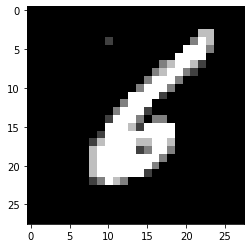

6


In [10]:
# Random sample
rand_num = np.random.randint(60000)
# plot 
plt.imshow(x_train[rand_num], cmap='gray')
plt.show()
# print label
print(y_train[rand_num])

In [11]:
# flatten the 2D img
x_train = np.reshape(x_train, [-1, 28*28])  # we want 784 samples
x_test = np.reshape(x_test,[-1, 28*28])

In [12]:
# normalize data
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

In [13]:
# one hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define Model
2 hidden layers
relu activation
512 neurson
fully_connected

second 
relu activation
512 neurson
fully_connected

output - fully connected
softmax

In [21]:
# model layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
# obtain metrics
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
            metrics=['accuracy'])
          


In [24]:
model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=0)
score = model.evaluate(x_test, y_test, batch_size=100, verbose=0)

In [25]:
score

[0.07558057963949778, 0.987200009226799]

In [26]:
# print review of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 250)               128250    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2510      
Total params: 532,680
Trainable params: 532,680
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Saving model
model.save('raw_model.h5')